In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('/content/city_day.csv')

In [30]:
display(data.head())

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [31]:
print(data.head())
print(data.info())
print(data.describe())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

In [32]:
data.fillna(method='ffill', inplace=True)

<ipython-input-32-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [34]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

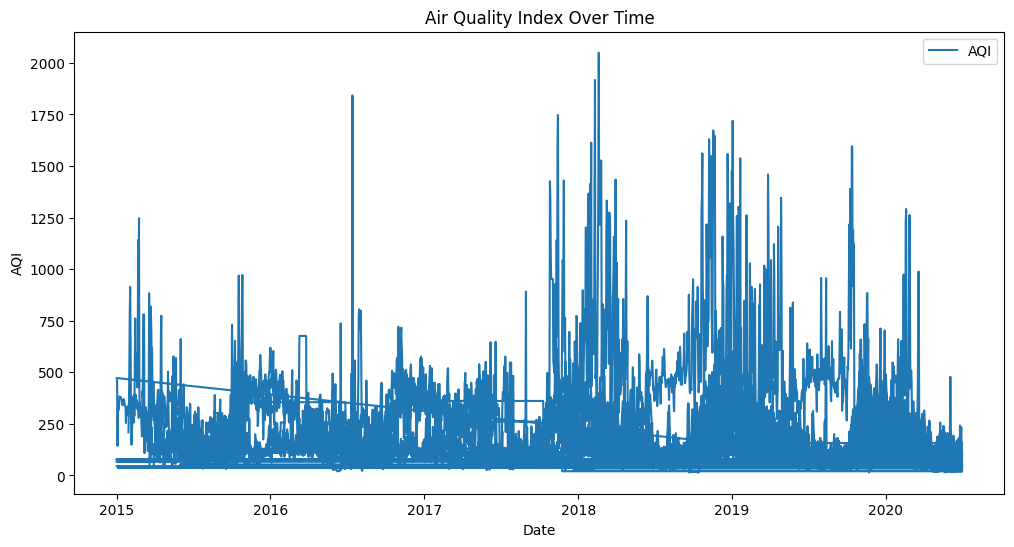

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(data['AQI'], label='AQI')
plt.title('Air Quality Index Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, shuffle=False)

In [38]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['AQI'], order=(5, 1, 0))
model_fit = model.fit()
display(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                23624
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -132472.674
Date:                Thu, 05 Dec 2024   AIC                         264957.348
Time:                        10:45:55   BIC                         265005.768
Sample:                             0   HQIC                        264973.063
                              - 23624                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2509      0.001   -188.648      0.000      -0.253      -0.248
ar.L2         -0.3146      0.002   -188.072      0.000      -0.318      -0.311
ar.L3         -0.2055      0.002   -121.364      0.000      -0.209      -0.202
ar.L4         -0.1720      0.002    -92.134      0.000      -0.176      -0.168
ar.L5         -0.1091      0.002    -59.972      0.000      -0.113      -0.106
sigma2      4395.6631      6.899    637.104      0.000    4382.140    4409.186
===================================================================================
Ljung-Box (L1) (Q):                   1.78   Jarque-Bera (JB):           5604995.01
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        78.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['AQI'], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 16403.183333171077


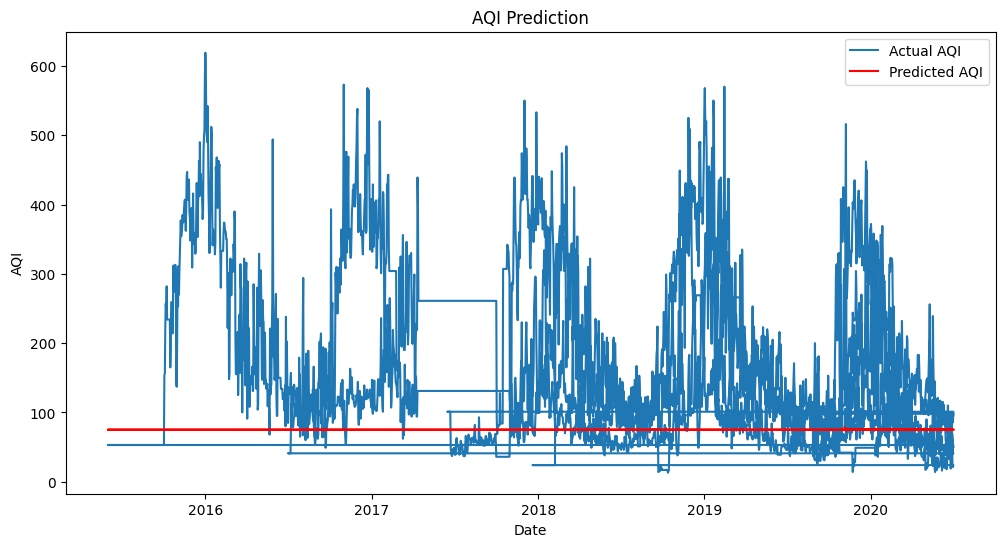

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['AQI'], label='Actual AQI')
plt.plot(test.index, forecast, label='Predicted AQI', color='red')
plt.title('AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()